## Data Mining Assignment 4

In [1]:
import pandas as pd 
import numpy as np

data = pd.read_csv('Airlines_graph.csv')

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
data.shape


data.dtypes

year                int64
month               int64
day                 int64
dep_time          float64
sched_dep_time      int64
dep_delay         float64
arr_time          float64
sched_arr_time      int64
arr_delay         float64
carrier            object
flight              int64
tailnum            object
origin             object
dest               object
air_time          float64
distance            int64
dtype: object

In [3]:
nx.__version__

'2.4'

In [4]:
# converting sched_dep_time to 'std' - Scheduled time of departure
data['std'] = data.sched_dep_time.astype(str).str.replace('(\d{2}$)', '') + ':' + data.sched_dep_time.astype(str).str.extract('(\d{2}$)', expand=False) + ':00'

In [5]:
# converting sched_arr_time to 'sta' - Scheduled time of arrival
data['sta'] = data.sched_arr_time.astype(str).str.replace('(\d{2}$)', '') + ':' + data.sched_arr_time.astype(str).str.extract('(\d{2}$)', expand=False) + ':00'

# converting dep_time to 'atd' - Actual time of departure
data['atd'] = data.dep_time.fillna(0).astype(np.int64).astype(str).str.replace('(\d{2}$)', '') + ':' + data.dep_time.fillna(0).astype(np.int64).astype(str).str.extract('(\d{2}$)', expand=False) + ':00'

In [6]:
# converting arr_time to 'ata' - Actual time of arrival
data['ata'] = data.arr_time.fillna(0).astype(np.int64).astype(str).str.replace('(\d{2}$)', '') + ':' + data.arr_time.fillna(0).astype(np.int64).astype(str).str.extract('(\d{2}$)', expand=False) + ':00'

In [7]:
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])

In [8]:
# finally we drop the columns we don't need
data = data.drop(columns = ['year', 'month', 'day'])

In [9]:
FG = nx.from_pandas_edgelist(data, source='origin', target='dest', edge_attr=True,)

In [10]:
FG.nodes()

NodeView(('EWR', 'MEM', 'LGA', 'FLL', 'SEA', 'JFK', 'DEN', 'ORD', 'MIA', 'PBI', 'MCO', 'CMH', 'MSP', 'IAD', 'CLT', 'TPA', 'DCA', 'SJU', 'ATL', 'BHM', 'SRQ', 'MSY', 'DTW', 'LAX', 'JAX', 'RDU', 'MDW', 'DFW', 'IAH', 'SFO', 'STL', 'CVG', 'IND', 'RSW', 'BOS', 'CLE'))

In [11]:
FG.edges()

EdgeView([('EWR', 'MEM'), ('EWR', 'SEA'), ('EWR', 'MIA'), ('EWR', 'ORD'), ('EWR', 'MSP'), ('EWR', 'TPA'), ('EWR', 'MSY'), ('EWR', 'DFW'), ('EWR', 'IAH'), ('EWR', 'SFO'), ('EWR', 'CVG'), ('EWR', 'IND'), ('EWR', 'RDU'), ('EWR', 'IAD'), ('EWR', 'RSW'), ('EWR', 'BOS'), ('EWR', 'PBI'), ('EWR', 'LAX'), ('EWR', 'MCO'), ('EWR', 'SJU'), ('LGA', 'FLL'), ('LGA', 'ORD'), ('LGA', 'PBI'), ('LGA', 'CMH'), ('LGA', 'IAD'), ('LGA', 'CLT'), ('LGA', 'MIA'), ('LGA', 'DCA'), ('LGA', 'BHM'), ('LGA', 'RDU'), ('LGA', 'ATL'), ('LGA', 'TPA'), ('LGA', 'MDW'), ('LGA', 'DEN'), ('LGA', 'MSP'), ('LGA', 'DTW'), ('LGA', 'STL'), ('LGA', 'MCO'), ('LGA', 'CVG'), ('LGA', 'IAH'), ('FLL', 'JFK'), ('SEA', 'JFK'), ('JFK', 'DEN'), ('JFK', 'MCO'), ('JFK', 'TPA'), ('JFK', 'SJU'), ('JFK', 'ATL'), ('JFK', 'SRQ'), ('JFK', 'DCA'), ('JFK', 'DTW'), ('JFK', 'LAX'), ('JFK', 'JAX'), ('JFK', 'CLT'), ('JFK', 'PBI'), ('JFK', 'CLE'), ('JFK', 'IAD'), ('JFK', 'BOS')])

/Users/utkupamuksuz/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:565: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


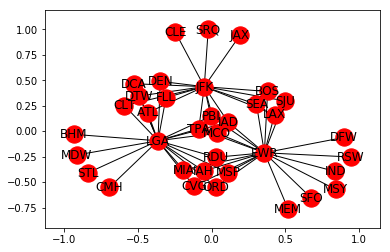

In [13]:
# your code is here (Quick view of the Graph.) 

In [17]:
nx.algorithms.degree_centrality(FG) 
# Notice the 3 airports from which all of our 100 rows of data originates
# Calculate average edge density of the Graph

# your code is here



0.09047619047619047

In [18]:
nx.average_shortest_path_length(FG) # Average shortest path length for ALL paths in the Graph

2.36984126984127

In [19]:
nx.average_degree_connectivity(FG) # For a node of degree k - What is the average of its neighbours' degree?

{20: 1.95, 1: 19.307692307692307, 2: 19.0625, 17: 2.0588235294117645, 3: 19.0}

In [20]:
# Let us find all the paths available
for path in nx.all_simple_paths(FG, source='JAX', target='DFW'):
 print(path)

['JAX', 'JFK', 'DEN', 'LGA', 'ORD', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'PBI', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'IAD', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'MIA', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'RDU', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'TPA', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'MSP', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'MCO', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'CVG', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'IAH', 'EWR', 'DFW']
['JAX', 'JFK', 'SEA', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'ORD', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'PBI', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'IAD', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'MIA', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'RDU', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'TPA', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'MSP', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'CVG', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'IAH', 'EWR', 'DFW']
['JAX', 'JFK',

In [21]:
# Let us find the dijkstra path from JAX to DFW.
# You can read more in-depth on how dijkstra works from this resource - https://courses.csail.mit.edu/6.006/fall11/lectures/lecture16.pdf
dijpath = nx.dijkstra_path(FG, source='JAX', target='DFW')
dijpath

['JAX', 'JFK', 'SEA', 'EWR', 'DFW']

In [22]:
# Let us try to find the dijkstra path weighted by airtime (approximate case)
shortpath = nx.dijkstra_path(FG, source='JAX', target='DFW', weight='air_time')
shortpath

['JAX', 'JFK', 'BOS', 'EWR', 'DFW']

### ASSIGNMENT-4 (100 Points)

Please use the Airlines_graph.csv for the following questions.

1. Please fill "your code here" sections on above cells (10 Points).

2. How many maximal cliques we can spot in this airline network? (20 Points)

3. List the most busiest/popular airport. (20 Points) 

4. As a thought leader, identify 6 new routes to recommend. Hint: Think if the pairs are symmetric or not and make your assumption/observation accordingly i.e. whether ORD-LAX and LAX-ORD two separate routes? (50 Points)



#### 1. Please fill "your code here" sections on above cells (10 Points).

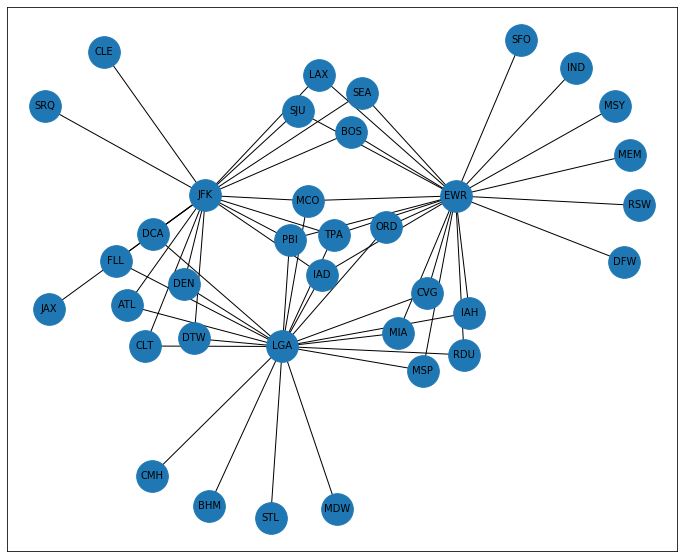

In [98]:
# labels
# your code is here (Quick view of the Graph.) 
plt.figure(figsize=(12,10))
nx.draw_networkx(FG, node_size = 1000, font_size=10)
plt.show()

In [53]:
# Calculate average edge density of the Graph
# your code is here

nx.density(FG)

0.09047619047619047

#### 2. How many maximal cliques we can spot in this airline network? (20 Points)

In [35]:
cliques = nx.find_cliques(FG)
print(len(list(cliques)))

57


#### 3. List the most busiest/popular airport. (20 Points) 

Degree of centrality

In [42]:
nx.degree_centrality(FG)

{'EWR': 0.5714285714285714,
 'MEM': 0.02857142857142857,
 'LGA': 0.5714285714285714,
 'FLL': 0.05714285714285714,
 'SEA': 0.05714285714285714,
 'JFK': 0.4857142857142857,
 'DEN': 0.05714285714285714,
 'ORD': 0.05714285714285714,
 'MIA': 0.05714285714285714,
 'PBI': 0.08571428571428572,
 'MCO': 0.08571428571428572,
 'CMH': 0.02857142857142857,
 'MSP': 0.05714285714285714,
 'IAD': 0.08571428571428572,
 'CLT': 0.05714285714285714,
 'TPA': 0.08571428571428572,
 'DCA': 0.05714285714285714,
 'SJU': 0.05714285714285714,
 'ATL': 0.05714285714285714,
 'BHM': 0.02857142857142857,
 'SRQ': 0.02857142857142857,
 'MSY': 0.02857142857142857,
 'DTW': 0.05714285714285714,
 'LAX': 0.05714285714285714,
 'JAX': 0.02857142857142857,
 'RDU': 0.05714285714285714,
 'MDW': 0.02857142857142857,
 'DFW': 0.02857142857142857,
 'IAH': 0.05714285714285714,
 'SFO': 0.02857142857142857,
 'STL': 0.02857142857142857,
 'CVG': 0.05714285714285714,
 'IND': 0.02857142857142857,
 'RSW': 0.02857142857142857,
 'BOS': 0.0571428

Based on the above results, we can infer that EWR and LGA are the most important airports

In [44]:
nx.eigenvector_centrality(FG,max_iter=1000)

{'EWR': 0.41270371965737646,
 'MEM': 0.06711591581231252,
 'LGA': 0.4392922830543092,
 'FLL': 0.1315672823889629,
 'SEA': 0.12724331900684804,
 'JFK': 0.3697305275838997,
 'DEN': 0.1315672823889629,
 'ORD': 0.13855579500673987,
 'MIA': 0.13855579500673987,
 'PBI': 0.19868319820127542,
 'MCO': 0.19868319820127542,
 'CMH': 0.07143987919442736,
 'MSP': 0.13855579500673987,
 'IAD': 0.19868319820127542,
 'CLT': 0.1315672823889629,
 'TPA': 0.19868319820127542,
 'DCA': 0.1315672823889629,
 'SJU': 0.12724331900684804,
 'ATL': 0.1315672823889629,
 'BHM': 0.07143987919442736,
 'SRQ': 0.06012740319453555,
 'MSY': 0.06711591581231252,
 'DTW': 0.1315672823889629,
 'LAX': 0.12724331900684804,
 'JAX': 0.06012740319453555,
 'RDU': 0.13855579500673987,
 'MDW': 0.07143987919442736,
 'DFW': 0.06711591581231252,
 'IAH': 0.13855579500673987,
 'SFO': 0.06711591581231252,
 'STL': 0.07143987919442736,
 'CVG': 0.13855579500673987,
 'IND': 0.06711591581231252,
 'RSW': 0.06711591581231252,
 'BOS': 0.127243319006

Eigen vector centrality determines the importance of a node based on it's connectivity to other important nodes.  
Based on the above results, we can infer that LGA is the most important airport

In [46]:
nx.betweenness_centrality(FG)

{'EWR': 0.44733893557422966,
 'MEM': 0.0,
 'LGA': 0.40952380952380946,
 'FLL': 0.007282913165266107,
 'SEA': 0.01204481792717087,
 'JFK': 0.30952380952380965,
 'DEN': 0.007282913165266107,
 'ORD': 0.011484593837535018,
 'MIA': 0.011484593837535018,
 'PBI': 0.030812324929971994,
 'MCO': 0.030812324929971994,
 'CMH': 0.0,
 'MSP': 0.011484593837535018,
 'IAD': 0.030812324929971994,
 'CLT': 0.007282913165266107,
 'TPA': 0.030812324929971994,
 'DCA': 0.007282913165266107,
 'SJU': 0.01204481792717087,
 'ATL': 0.007282913165266107,
 'BHM': 0.0,
 'SRQ': 0.0,
 'MSY': 0.0,
 'DTW': 0.007282913165266107,
 'LAX': 0.01204481792717087,
 'JAX': 0.0,
 'RDU': 0.011484593837535018,
 'MDW': 0.0,
 'DFW': 0.0,
 'IAH': 0.011484593837535018,
 'SFO': 0.0,
 'STL': 0.0,
 'CVG': 0.011484593837535018,
 'IND': 0.0,
 'RSW': 0.0,
 'BOS': 0.01204481792717087,
 'CLE': 0.0}

Betweenness centrality measures the extent to which a vertex lies on paths between other vertices. Vertices with high betweenness may have considerable influence within a network by virtue of their control over information passing between others.

Based on the above results, we can infer that EWR,LGA airport has the highest betweeness centrality

##### Based on the degree of centrality, eigen vector centrality and betweeness centrality we can conclude that the EWR airport is the most busiest/popular airport

#### 4. As a thought leader, identify 6 new routes to recommend. Hint: Think if the pairs are symmetric or not and make your assumption/observation accordingly i.e. whether ORD-LAX and LAX-ORD two separate routes? (50 Points)


In [103]:
# Import necessary modules
from itertools import combinations
from collections import defaultdict

# Initialize the defaultdict: recommended
recommended = defaultdict(int)

# Iterate over all the nodes in G
for n, d in FG.nodes(data=True):

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(FG.neighbors(n), 2):
    
        # Check whether n1 and n2 do not have an edge
        if not FG.has_edge(n1, n2):
        
            # Increment recommended
            recommended[(n1, n2)] += 1

# Identify the top 6 pairs of users
all_counts = sorted(recommended.values())
top6_pairs = [pair for pair, count in recommended.items() if count > all_counts[-12]]
print(top6_pairs)

[('LGA', 'JFK'), ('EWR', 'JFK'), ('JFK', 'LGA'), ('LGA', 'EWR'), ('EWR', 'LGA'), ('JFK', 'EWR')]


The above-listed airport pairs are 6 new routes, also these route pairs are non-symmetric. However, the airports JFK and LGA airports are in the same city. EWR is also situated very close to these airports.So, before implementing these routes we may have to check for financial viability and then proceed with implementation.